In [1]:
import nltk

In [2]:
def lire_les_fichier(link):
    with open(link, 'r', encoding='utf-8') as file:
        return file.read()

**Préparation du data frame des avis negatifs**

In [3]:
import os
import glob
import pandas as pd

In [8]:
dossier_negatif = "C:\\Users\\HP\\Desktop\\revues de films\\Revues-de-films\\movies\\movies1000\\neg"
chemins_fichiers_negatifs = glob.glob(os.path.join(dossier_negatif, '*.txt'))
avis_negatifs = [(lire_les_fichier(link), 'negatif') for link in chemins_fichiers_negatifs]
df_avis_negatif = pd.DataFrame(avis_negatifs, columns=['Avis', 'Type'])
df_avis_negatif

,Avis,Type
0,"plot : two teen couples go to a church party ,...",negatif
1,the happy bastard's quick movie review \ndamn ...,negatif
2,it is movies like these that make a jaded movi...,negatif
3,""" quest for camelot "" is warner bros . ' firs...",negatif
4,synopsis : a mentally unstable man undergoing ...,negatif
...,...,...
995,"if anything , "" stigmata "" should be taken as ...",negatif
996,"john boorman's "" zardoz "" is a goofy cinematic...",negatif
997,the kids in the hall are an acquired taste . \...,negatif
998,there was a time when john carpenter was a gre...,negatif


**Préparation du data frame des avis positifs**

In [10]:
dossier_positif = "C:\\Users\\HP\\Desktop\\revues de films\\Revues-de-films\\movies\\movies1000\\pos"
chemins_fichiers_positifs = glob.glob(os.path.join(dossier_positif, '*.txt'))
avis_positifs = [(lire_les_fichier(link), 'positif') for link in chemins_fichiers_positifs]
df_avis_positif = pd.DataFrame(avis_positifs, columns=['Avis', 'Type'])
df_avis_positif

,Avis,Type
0,films adapted from comic books have had plenty...,positif
1,every now and then a movie comes along from a ...,positif
2,you've got mail works alot better than it dese...,positif
3,""" jaws "" is a rare film that grabs your atten...",positif
4,moviemaking is a lot like being the general ma...,positif
...,...,...
995,wow ! what a movie . \nit's everything a movie...,positif
996,"richard gere can be a commanding actor , but h...",positif
997,"glory--starring matthew broderick , denzel was...",positif
998,steven spielberg's second epic film on world w...,positif


**Concatination des deux df (postif et negaitf)**

In [11]:
df_avis_total = pd.concat([df_avis_negatif, df_avis_positif], ignore_index=True)
df_avis_total

,Avis,Type
0,"plot : two teen couples go to a church party ,...",negatif
1,the happy bastard's quick movie review \ndamn ...,negatif
2,it is movies like these that make a jaded movi...,negatif
3,""" quest for camelot "" is warner bros . ' firs...",negatif
4,synopsis : a mentally unstable man undergoing ...,negatif
...,...,...
1995,wow ! what a movie . \nit's everything a movie...,positif
1996,"richard gere can be a commanding actor , but h...",positif
1997,"glory--starring matthew broderick , denzel was...",positif
1998,steven spielberg's second epic film on world w...,positif


# Pre Processing

**Enlever la ponctuation**

In [12]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [13]:
import string
df_avis_total['Avis']= df_avis_total['Avis'].apply(lambda x:remove_punctuation(x))
df_avis_total

,Avis,Type
0,plot two teen couples go to a church party d...,negatif
1,the happy bastards quick movie review \ndamn t...,negatif
2,it is movies like these that make a jaded movi...,negatif
3,quest for camelot is warner bros first fe...,negatif
4,synopsis a mentally unstable man undergoing p...,negatif
...,...,...
1995,wow what a movie \nits everything a movie ca...,positif
1996,richard gere can be a commanding actor but he...,positif
1997,glorystarring matthew broderick denzel washin...,positif
1998,steven spielbergs second epic film on world wa...,positif


**Enlever la majuscule**

In [14]:
df_avis_total['Avis']= df_avis_total['Avis'].apply(lambda x: x.lower())
df_avis_total

,Avis,Type
0,plot two teen couples go to a church party d...,negatif
1,the happy bastards quick movie review \ndamn t...,negatif
2,it is movies like these that make a jaded movi...,negatif
3,quest for camelot is warner bros first fe...,negatif
4,synopsis a mentally unstable man undergoing p...,negatif
...,...,...
1995,wow what a movie \nits everything a movie ca...,positif
1996,richard gere can be a commanding actor but he...,positif
1997,glorystarring matthew broderick denzel washin...,positif
1998,steven spielbergs second epic film on world wa...,positif


**Tokenization**

In [15]:
df_avis_total['Avis']=df_avis_total['Avis'].astype(str)

In [16]:
from nltk.tokenize import word_tokenize
def tokenize_review(review):
    tokens = word_tokenize(review)
    return tokens

In [17]:
df_avis_total['tokens'] = df_avis_total['Avis'].apply(tokenize_review)
df_avis_total.head()

,Avis,Type,tokens
0,plot two teen couples go to a church party d...,negatif,"[plot, two, teen, couples, go, to, a, church, ..."
1,the happy bastards quick movie review \ndamn t...,negatif,"[the, happy, bastards, quick, movie, review, d..."
2,it is movies like these that make a jaded movi...,negatif,"[it, is, movies, like, these, that, make, a, j..."
3,quest for camelot is warner bros first fe...,negatif,"[quest, for, camelot, is, warner, bros, first,..."
4,synopsis a mentally unstable man undergoing p...,negatif,"[synopsis, a, mentally, unstable, man, undergo..."


In [18]:
#les avis sont écrites en anglais

**Enlever les Stopwords**

In [19]:
from nltk import ngrams
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

In [20]:
stopwords = nltk.corpus.stopwords.words('english')

In [21]:
#stopwords sont les mots qui n'ont pas de sens comme the, a, is are..
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [22]:
df_avis_total['tokens']= df_avis_total['tokens'].apply(lambda x:remove_stopwords(x))
df_avis_total.head()

,Avis,Type,tokens
0,plot two teen couples go to a church party d...,negatif,"[plot, two, teen, couples, go, church, party, ..."
1,the happy bastards quick movie review \ndamn t...,negatif,"[happy, bastards, quick, movie, review, damn, ..."
2,it is movies like these that make a jaded movi...,negatif,"[movies, like, make, jaded, movie, viewer, tha..."
3,quest for camelot is warner bros first fe...,negatif,"[quest, camelot, warner, bros, first, featurel..."
4,synopsis a mentally unstable man undergoing p...,negatif,"[synopsis, mentally, unstable, man, undergoing..."


**Stemming**

In [23]:
#normaliser les mots et garder la racine du mot par exemple "mentally" peut devenir "mental"
porter_stemmer = PorterStemmer()
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
df_avis_total['stem']=df_avis_total['tokens'].apply(lambda x: stemming(x))
df_avis_total.head()

,Avis,Type,tokens,stem
0,plot two teen couples go to a church party d...,negatif,"[plot, two, teen, couples, go, church, party, ...","[plot, two, teen, coupl, go, church, parti, dr..."
1,the happy bastards quick movie review \ndamn t...,negatif,"[happy, bastards, quick, movie, review, damn, ...","[happi, bastard, quick, movi, review, damn, y2..."
2,it is movies like these that make a jaded movi...,negatif,"[movies, like, make, jaded, movie, viewer, tha...","[movi, like, make, jade, movi, viewer, thank, ..."
3,quest for camelot is warner bros first fe...,negatif,"[quest, camelot, warner, bros, first, featurel...","[quest, camelot, warner, bro, first, featurele..."
4,synopsis a mentally unstable man undergoing p...,negatif,"[synopsis, mentally, unstable, man, undergoing...","[synopsi, mental, unstabl, man, undergo, psych..."


**Lemmatization**

In [24]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
df_avis_total['lemmatize']=df_avis_total['stem'].apply(lambda x:lemmatizer(x))
df_avis_total.head()

,Avis,Type,tokens,stem,lemmatize
0,plot two teen couples go to a church party d...,negatif,"[plot, two, teen, couples, go, church, party, ...","[plot, two, teen, coupl, go, church, parti, dr...","[plot, two, teen, coupl, go, church, parti, dr..."
1,the happy bastards quick movie review \ndamn t...,negatif,"[happy, bastards, quick, movie, review, damn, ...","[happi, bastard, quick, movi, review, damn, y2...","[happi, bastard, quick, movi, review, damn, y2..."
2,it is movies like these that make a jaded movi...,negatif,"[movies, like, make, jaded, movie, viewer, tha...","[movi, like, make, jade, movi, viewer, thank, ...","[movi, like, make, jade, movi, viewer, thank, ..."
3,quest for camelot is warner bros first fe...,negatif,"[quest, camelot, warner, bros, first, featurel...","[quest, camelot, warner, bro, first, featurele...","[quest, camelot, warner, bro, first, featurele..."
4,synopsis a mentally unstable man undergoing p...,negatif,"[synopsis, mentally, unstable, man, undergoing...","[synopsi, mental, unstabl, man, undergo, psych...","[synopsi, mental, unstabl, man, undergo, psych..."


In [25]:
# Pour df_avis_positif
df_avis_positif['Avis'] = df_avis_positif['Avis'].apply(lambda x: remove_punctuation(x))
df_avis_positif['Avis'] = df_avis_positif['Avis'].apply(lambda x: x.lower())
df_avis_positif['Avis'] = df_avis_positif['Avis'].astype(str)
df_avis_positif['tokens'] = df_avis_positif['Avis'].apply(tokenize_review)
df_avis_positif['tokens'] = df_avis_positif['tokens'].apply(lambda x: remove_stopwords(x))
df_avis_positif['stem'] = df_avis_positif['tokens'].apply(lambda x: stemming(x))
df_avis_positif['lemmatize'] = df_avis_positif['tokens'].apply(lambda x: lemmatizer(x))
df_avis_positif

,Avis,Type,tokens,stem,lemmatize
0,films adapted from comic books have had plenty...,positif,"[films, adapted, comic, books, plenty, success...","[film, adapt, comic, book, plenti, success, wh...","[film, adapted, comic, book, plenty, success, ..."
1,every now and then a movie comes along from a ...,positif,"[every, movie, comes, along, suspect, studio, ...","[everi, movi, come, along, suspect, studio, ev...","[every, movie, come, along, suspect, studio, e..."
2,youve got mail works alot better than it deser...,positif,"[youve, got, mail, works, alot, better, deserv...","[youv, got, mail, work, alot, better, deserv, ...","[youve, got, mail, work, alot, better, deserve..."
3,jaws is a rare film that grabs your attenti...,positif,"[jaws, rare, film, grabs, attention, shows, si...","[jaw, rare, film, grab, attent, show, singl, i...","[jaw, rare, film, grab, attention, show, singl..."
4,moviemaking is a lot like being the general ma...,positif,"[moviemaking, lot, like, general, manager, nfl...","[moviemak, lot, like, gener, manag, nfl, team,...","[moviemaking, lot, like, general, manager, nfl..."
...,...,...,...,...,...
995,wow what a movie \nits everything a movie ca...,positif,"[wow, movie, everything, movie, funny, dramati...","[wow, movi, everyth, movi, funni, dramat, inte...","[wow, movie, everything, movie, funny, dramati..."
996,richard gere can be a commanding actor but he...,positif,"[richard, gere, commanding, actor, hes, always...","[richard, gere, command, actor, he, alway, gre...","[richard, gere, commanding, actor, he, always,..."
997,glorystarring matthew broderick denzel washin...,positif,"[glorystarring, matthew, broderick, denzel, wa...","[glorystar, matthew, broderick, denzel, washin...","[glorystarring, matthew, broderick, denzel, wa..."
998,steven spielbergs second epic film on world wa...,positif,"[steven, spielbergs, second, epic, film, world...","[steven, spielberg, second, epic, film, world,...","[steven, spielberg, second, epic, film, world,..."


In [26]:
#df_avis_negatif
df_avis_negatif['Avis'] = df_avis_negatif['Avis'].apply(lambda x: remove_punctuation(x))
df_avis_negatif['Avis'] = df_avis_negatif['Avis'].apply(lambda x: x.lower())
df_avis_negatif['Avis'] = df_avis_negatif['Avis'].astype(str)
df_avis_negatif['tokens'] = df_avis_negatif['Avis'].apply(tokenize_review)
df_avis_negatif['tokens'] = df_avis_negatif['tokens'].apply(lambda x: remove_stopwords(x))
df_avis_negatif['stem'] = df_avis_negatif['tokens'].apply(lambda x: stemming(x))
df_avis_negatif['lemmatize'] = df_avis_negatif['tokens'].apply(lambda x: lemmatizer(x))
df_avis_negatif

,Avis,Type,tokens,stem,lemmatize
0,plot two teen couples go to a church party d...,negatif,"[plot, two, teen, couples, go, church, party, ...","[plot, two, teen, coupl, go, church, parti, dr...","[plot, two, teen, couple, go, church, party, d..."
1,the happy bastards quick movie review \ndamn t...,negatif,"[happy, bastards, quick, movie, review, damn, ...","[happi, bastard, quick, movi, review, damn, y2...","[happy, bastard, quick, movie, review, damn, y..."
2,it is movies like these that make a jaded movi...,negatif,"[movies, like, make, jaded, movie, viewer, tha...","[movi, like, make, jade, movi, viewer, thank, ...","[movie, like, make, jaded, movie, viewer, than..."
3,quest for camelot is warner bros first fe...,negatif,"[quest, camelot, warner, bros, first, featurel...","[quest, camelot, warner, bro, first, featurele...","[quest, camelot, warner, bros, first, featurel..."
4,synopsis a mentally unstable man undergoing p...,negatif,"[synopsis, mentally, unstable, man, undergoing...","[synopsi, mental, unstabl, man, undergo, psych...","[synopsis, mentally, unstable, man, undergoing..."
...,...,...,...,...,...
995,if anything stigmata should be taken as a w...,negatif,"[anything, stigmata, taken, warning, releasing...","[anyth, stigmata, taken, warn, releas, similar...","[anything, stigma, taken, warning, releasing, ..."
996,john boormans zardoz is a goofy cinematic de...,negatif,"[john, boormans, zardoz, goofy, cinematic, deb...","[john, boorman, zardoz, goofi, cinemat, debacl...","[john, boormans, zardoz, goofy, cinematic, deb..."
997,the kids in the hall are an acquired taste \n...,negatif,"[kids, hall, acquired, taste, took, least, sea...","[kid, hall, acquir, tast, took, least, season,...","[kid, hall, acquired, taste, took, least, seas..."
998,there was a time when john carpenter was a gre...,negatif,"[time, john, carpenter, great, horror, directo...","[time, john, carpent, great, horror, director,...","[time, john, carpenter, great, horror, directo..."


# **Statistiques**

**Word frequency Counts**

In [27]:
freq = {}
for lemmatized_list in df_avis_total['lemmatize']:
    for lemma in lemmatized_list:
        if lemma not in freq:
            freq[lemma] = 1
        else:
            freq[lemma] += 1

In [28]:
list(freq.items())[:20]

[('plot', 1553),
 ('two', 1825),
 ('teen', 170),
 ('coupl', 472),
 ('go', 1955),
 ('church', 74),
 ('parti', 200),
 ('drink', 86),
 ('drive', 219),
 ('get', 3189),
 ('accid', 113),
 ('one', 5759),
 ('guy', 904),
 ('die', 454),
 ('girlfriend', 218),
 ('continu', 263),
 ('see', 2202),
 ('life', 1486),
 ('nightmar', 85),
 ('what', 234)]

In [29]:
import matplotlib.pyplot as plt

In [30]:
freq_df = pd.DataFrame(list(freq.items()), columns=['Lemme', 'Fréquence'])
freq_df = freq_df.sort_values(by='Fréquence', ascending=False)
print(freq_df.head(20))


       Lemme  Fréquence
41      film      11107
22      movi       6857
11       one       5759
83      like       3997
77   charact       3855
9        get       3189
34      make       3152
253     time       2902
89     scene       2638
36      even       2602
50      good       2383
181     play       2361
254    stori       2320
16       see       2202
176    would       2042
311     much       2025
212     also       1965
4         go       1955
51       way       1855
57      seem       1834


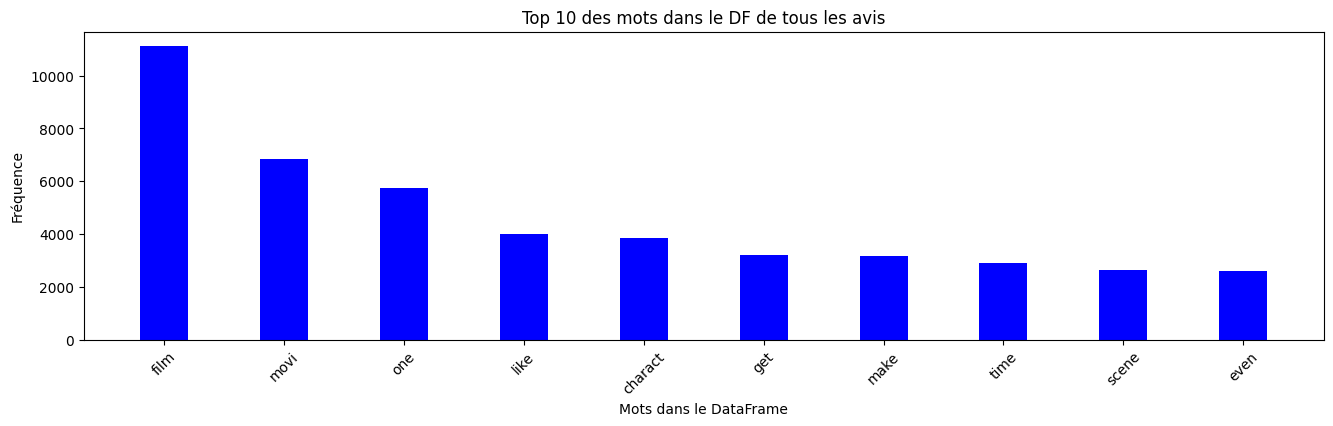

In [31]:
plt.figure(figsize=(16, 4))
plt.bar(freq_df['Lemme'][:10], freq_df['Fréquence'][:10], color='blue', width=0.4)
plt.xlabel("Mots dans le DataFrame")
plt.ylabel("Fréquence")
plt.title("Top 10 des mots dans le DF de tous les avis")
plt.xticks(rotation=45)
plt.savefig("wordfrequency.png")
plt.show()

**n-grams**

In [32]:
from collections import defaultdict
from nltk import ngrams
def generate_N_grams(text,n=1):
  my_ngrams = ngrams(text.split(), n)
  return my_ngrams
ngram = defaultdict(int)
for text in df_avis_total.Avis:
  for word in generate_N_grams(text,2):
    i = word[0]+' '+word[1]
    ngram[i]+=1

In [33]:
from nltk.corpus import stopwords
ngram = defaultdict(int)
for text in df_avis_total.Avis:
  for word in generate_N_grams(text,2):
    i = word[0]+' '+word[1]
    ngram[str(i)] += 1  # Convertir la clé en chaîne de caractères

# Filtrage des bigrammes
filtered_ngram = {k: v for k, v in ngram.items() if not all(word in stopwords.words('english') for word in k.split())}

In [34]:
filtered_ngram_df = pd.DataFrame(sorted(filtered_ngram.items(), key=lambda x: x[1], reverse=True))

# Affichage des 10 premiers bigrammes après le filtrage
print(filtered_ngram_df.head(10))


            0     1
0    the film  4009
1   the movie  1950
2      one of  1678
3   this film  1508
4  this movie   975
5   the story   958
6     film is   920
7   the first   897
8      to see   769
9     to make   759


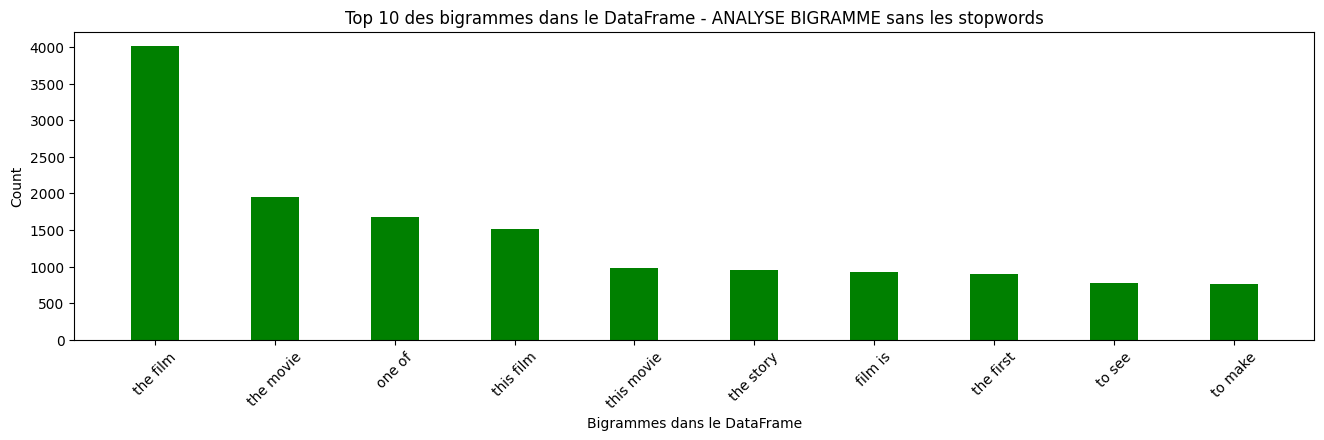

In [35]:
plt.figure(figsize=(16, 4))
plt.bar(filtered_ngram_df[0][:10], filtered_ngram_df[1][:10], color='green', width=0.4)
plt.xlabel("Bigrammes dans le DataFrame")
plt.ylabel("Count")
plt.title("Top 10 des bigrammes dans le DataFrame - ANALYSE BIGRAMME sans les stopwords")
plt.xticks(rotation=45)
plt.savefig("bigram_analysis_filtered.png")
plt.show()

In [36]:
unigram = defaultdict(int)
for text in df_avis_total.Avis:
    for word in text.split():  # Utilisation de split pour générer des unigrammes
        unigram[word] += 1

In [37]:
filtered_unigram = {k: v for k, v in unigram.items() if k not in stopwords.words('english')}
filtered_unigram_df = pd.DataFrame(sorted(filtered_unigram.items(), key=lambda x: x[1], reverse=True))
print(filtered_unigram_df.head(10))


       0     1
0   film  8860
1    one  5521
2  movie  5440
3   like  3553
4   even  2555
5   good  2320
6   time  2283
7  story  2118
8  films  2102
9  would  2042


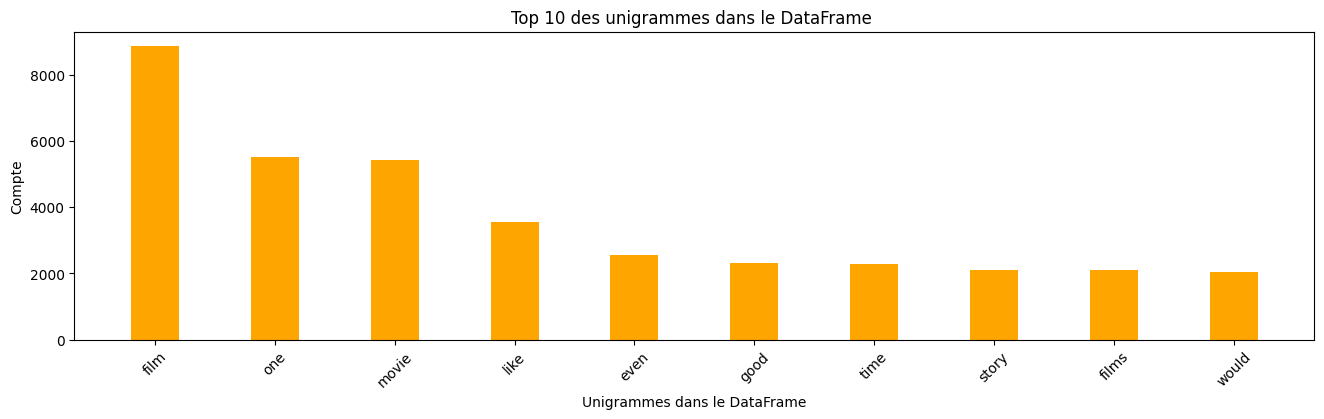

In [38]:
plt.figure(figsize=(16, 4))
plt.bar(filtered_unigram_df[0][:10], filtered_unigram_df[1][:10], color='orange', width=0.4)
plt.xlabel("Unigrammes dans le DataFrame")
plt.ylabel("Compte")
plt.title("Top 10 des unigrammes dans le DataFrame ")
plt.xticks(rotation=45)
plt.savefig("unigram_analysis_filtered.png")
plt.show()

In [39]:
taille_vocabulaire_unigram = len(filtered_unigram)
print("Taille du vocab pour les unigrammes filtrés :", taille_vocabulaire_unigram)

Taille du vocab pour les unigrammes filtrés : 47425


In [40]:
# Génération des unigrammes pour df_avis_negatif
unigram_negatif = defaultdict(int)
for text in df_avis_negatif['Avis']:
    for word in text.split():
        unigram_negatif[word] += 1
filtered_unigram_negatif = {k: v for k, v in unigram_negatif.items() if k not in stopwords.words('english')}

taille_vocab_negatif = len(filtered_unigram_negatif)
print("Taille du vocabulaire pour df_avis_negatif :", taille_vocab_negatif)

Taille du vocabulaire pour df_avis_negatif : 32598


In [41]:
unigram_positif = defaultdict(int)
for text in df_avis_positif['Avis']:
    for word in text.split():
        unigram_positif[word] += 1

# Filtrage des unigrammes pour df_avis_positif
filtered_unigram_positif = {k: v for k, v in unigram_positif.items() if k not in stopwords.words('english')}

# Taille du vocabulaire pour df_avis_positif
taille_vocabulaire_positif = len(filtered_unigram_positif)
print("Taille du vocabulaire pour df_avis_positif :", taille_vocabulaire_positif)

Taille du vocabulaire pour df_avis_positif : 34787


In [42]:
import matplotlib.pyplot as plt

# Tailles du vocabulaire pour les avis négatifs et positifs
taille_vocabulaire_negatif = taille_vocab_negatif
taille_vocabulaire_positif = taille_vocabulaire_positif

# Création du graphique
labels = ['Avis Négatifs', 'Avis Positifs']
tailles_vocabulaire = [taille_vocabulaire_negatif, taille_vocabulaire_positif]


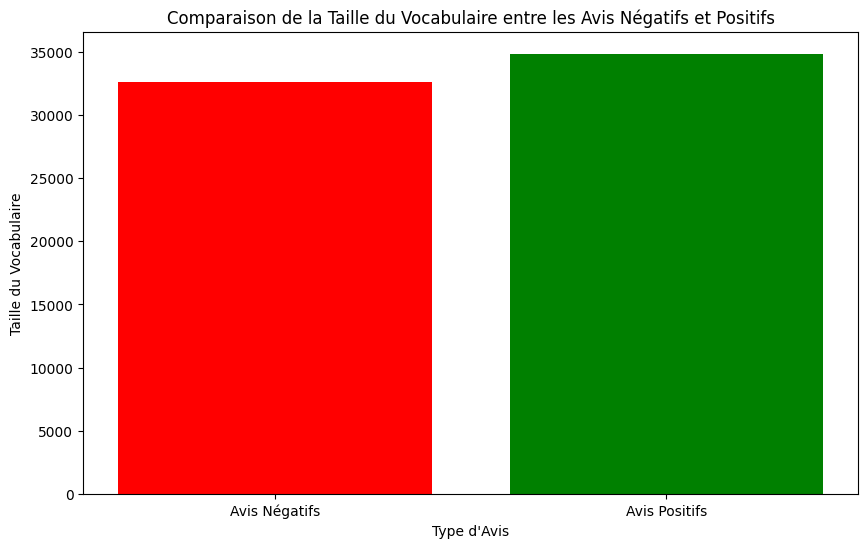

In [43]:
plt.figure(figsize=(10, 6))
plt.bar(labels, tailles_vocabulaire, color=['red', 'green'])
plt.xlabel('Type d\'Avis')
plt.ylabel('Taille du Vocabulaire')
plt.title('Comparaison de la Taille du Vocabulaire entre les Avis Négatifs et Positifs')
plt.show()

In [44]:
from wordcloud import WordCloud

In [45]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

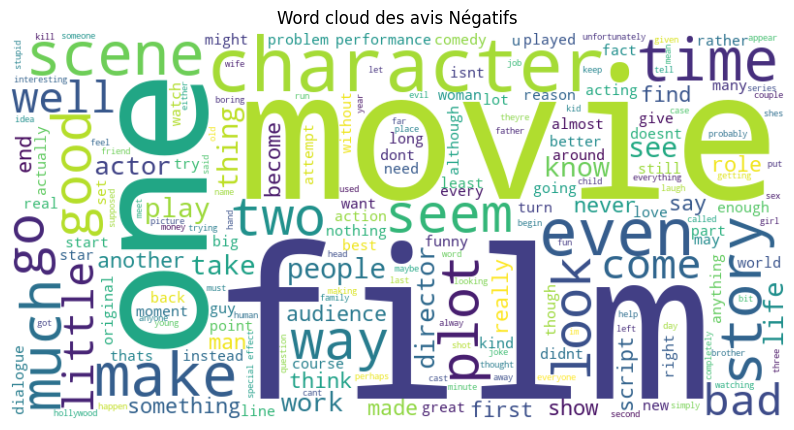

In [46]:
text_negatif = ' '.join([' '.join(tokens) for tokens in df_avis_negatif['lemmatize']])
generate_wordcloud(text_negatif, 'Word cloud des avis Négatifs')

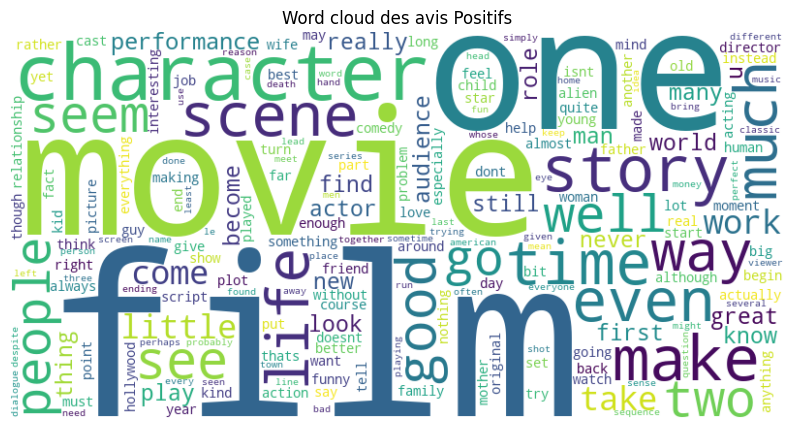

In [47]:
text_positif = ' '.join([' '.join(tokens) for tokens in df_avis_positif['lemmatize']])
generate_wordcloud(text_positif, 'Word cloud des avis Positifs')

In [48]:
df_avis_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Avis       2000 non-null   object
 1   Type       2000 non-null   object
 2   tokens     2000 non-null   object
 3   stem       2000 non-null   object
 4   lemmatize  2000 non-null   object
dtypes: object(5)
memory usage: 78.3+ KB


In [49]:
df_avis_total.to_csv('avis_total.txt', sep='\t', index=False, header=False, encoding='utf-8')

print("done.")

done.


Topic modeling with Latent Dirichlet Allocation (LDA)

In [50]:
from gensim import corpora, models
texts = df_avis_total['lemmatize'].tolist()
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [51]:
lda_model = models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,num_topics=10,passes=10)

In [52]:
for i, topic in lda_model.show_topics(num_topics=10, num_words=10, formatted=False):
    print(f"Sujet {i+1}: {' '.join([word[0] for word in topic])}")

Sujet 1: movi film one like charact star play even get scene
Sujet 2: film one movi like charact get make scene time even
Sujet 3: film one like stori charact make movi scene life time
Sujet 4: film movi one get like time even charact make funni
Sujet 5: movi film one charact get like make play scene good
Sujet 6: film movi one charact life like get make stori vampir
Sujet 7: film movi one like charact make get time see go
Sujet 8: film one like movi make good time charact get stori
Sujet 9: film movi one charact like time get make even end
Sujet 10: film movi one charact scream like time make play get


In [54]:
df_avis_total['Type'].value_counts()

Type
negatif    1000
positif    1000
Name: count, dtype: int64

**Compléments optionnels Word2Vec avec les stratégies d'agrégation naïves**

In [55]:
df_avis_wordvec = df_avis_total.copy()
df_avis_wordvec

,Avis,Type,tokens,stem,lemmatize
0,plot two teen couples go to a church party d...,negatif,"[plot, two, teen, couples, go, church, party, ...","[plot, two, teen, coupl, go, church, parti, dr...","[plot, two, teen, coupl, go, church, parti, dr..."
1,the happy bastards quick movie review \ndamn t...,negatif,"[happy, bastards, quick, movie, review, damn, ...","[happi, bastard, quick, movi, review, damn, y2...","[happi, bastard, quick, movi, review, damn, y2..."
2,it is movies like these that make a jaded movi...,negatif,"[movies, like, make, jaded, movie, viewer, tha...","[movi, like, make, jade, movi, viewer, thank, ...","[movi, like, make, jade, movi, viewer, thank, ..."
3,quest for camelot is warner bros first fe...,negatif,"[quest, camelot, warner, bros, first, featurel...","[quest, camelot, warner, bro, first, featurele...","[quest, camelot, warner, bro, first, featurele..."
4,synopsis a mentally unstable man undergoing p...,negatif,"[synopsis, mentally, unstable, man, undergoing...","[synopsi, mental, unstabl, man, undergo, psych...","[synopsi, mental, unstabl, man, undergo, psych..."
...,...,...,...,...,...
1995,wow what a movie \nits everything a movie ca...,positif,"[wow, movie, everything, movie, funny, dramati...","[wow, movi, everyth, movi, funni, dramat, inte...","[wow, movi, everyth, movi, funni, dramat, inte..."
1996,richard gere can be a commanding actor but he...,positif,"[richard, gere, commanding, actor, hes, always...","[richard, gere, command, actor, he, alway, gre...","[richard, gere, command, actor, he, alway, gre..."
1997,glorystarring matthew broderick denzel washin...,positif,"[glorystarring, matthew, broderick, denzel, wa...","[glorystar, matthew, broderick, denzel, washin...","[glorystar, matthew, broderick, denzel, washin..."
1998,steven spielbergs second epic film on world wa...,positif,"[steven, spielbergs, second, epic, film, world...","[steven, spielberg, second, epic, film, world,...","[steven, spielberg, second, epic, film, world,..."


In [56]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
import nltk

In [57]:
df_avis_wordvec['tokens'] = df_avis_wordvec['Avis'].apply(word_tokenize)
model = Word2Vec(sentences=df_avis_total['tokens'], vector_size=100, window=5, min_count=1, workers=4)
# Fonction d'agrégation naïve (moyenne)
def aggregate_vectors_naive(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if not vectors:
        return np.zeros(model.vector_size)  # Vecteur nul si aucun mot n'est présent dans le modèle
    return np.mean(vectors, axis=0)

# Appliquer la fonction d'agrégation naïve pour chaque avis
df_avis_wordvec['embedding_naive'] = df_avis_wordvec['tokens'].apply(lambda x: aggregate_vectors_naive(x, model))


In [58]:
df_avis_wordvec[['tokens', 'embedding_naive','Avis','Type']]

,tokens,embedding_naive,Avis,Type
0,"[plot, two, teen, couples, go, to, a, church, ...","[-0.2136328, 0.5333792, 0.11094083, 0.1916366,...",plot two teen couples go to a church party d...,negatif
1,"[the, happy, bastards, quick, movie, review, d...","[-0.21774888, 0.5350701, 0.13336416, 0.1927717...",the happy bastards quick movie review \ndamn t...,negatif
2,"[it, is, movies, like, these, that, make, a, j...","[-0.19383107, 0.5376353, 0.13279614, 0.1761756...",it is movies like these that make a jaded movi...,negatif
3,"[quest, for, camelot, is, warner, bros, first,...","[-0.13723555, 0.39918086, 0.12818481, 0.093696...",quest for camelot is warner bros first fe...,negatif
4,"[synopsis, a, mentally, unstable, man, undergo...","[-0.15273207, 0.44855574, 0.1536147, 0.1016533...",synopsis a mentally unstable man undergoing p...,negatif
...,...,...,...,...
1995,"[wow, what, a, movie, its, everything, a, movi...","[-0.19602022, 0.556792, 0.11758373, 0.1797996,...",wow what a movie \nits everything a movie ca...,positif
1996,"[richard, gere, can, be, a, commanding, actor,...","[-0.14897114, 0.42759725, 0.18923442, 0.080002...",richard gere can be a commanding actor but he...,positif
1997,"[glorystarring, matthew, broderick, denzel, wa...","[-0.15816186, 0.40943724, 0.18640733, 0.095221...",glorystarring matthew broderick denzel washin...,positif
1998,"[steven, spielbergs, second, epic, film, on, w...","[-0.15998846, 0.47931656, 0.17339656, 0.152145...",steven spielbergs second epic film on world wa...,positif


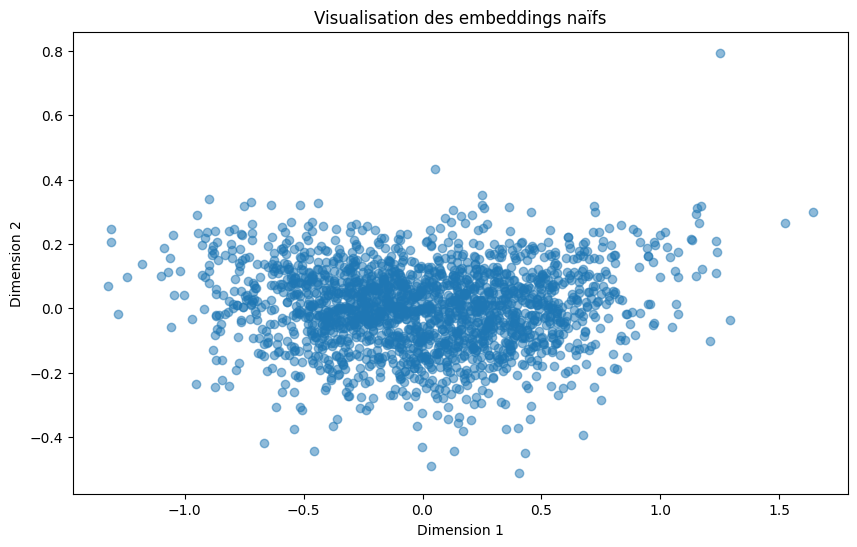

In [59]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
embedding_naive_2d = pca.fit_transform(np.stack(df_avis_wordvec['embedding_naive']))

# Ajout des nouvelles colonnes 'embedding_naive_2d_x' et 'embedding_naive_2d_y'
df_avis_wordvec['embedding_naive_2d_x'] = embedding_naive_2d[:, 0]
df_avis_wordvec['embedding_naive_2d_y'] = embedding_naive_2d[:, 1]

# Affichage du graphique 2D
plt.figure(figsize=(10, 6))
plt.scatter(df_avis_wordvec['embedding_naive_2d_x'], df_avis_wordvec['embedding_naive_2d_y'], alpha=0.5)
plt.title('Visualisation des embeddings naïfs')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

**==> Donc les avis partageant des similitudes sémantiques importantes.**

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [61]:
df_avis_wordvec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avis                  2000 non-null   object 
 1   Type                  2000 non-null   object 
 2   tokens                2000 non-null   object 
 3   stem                  2000 non-null   object 
 4   lemmatize             2000 non-null   object 
 5   embedding_naive       2000 non-null   object 
 6   embedding_naive_2d_x  2000 non-null   float32
 7   embedding_naive_2d_y  2000 non-null   float32
dtypes: float32(2), object(6)
memory usage: 109.5+ KB


# LogisticRegression

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
# 'embedding_naive' est en format numpy array
X_naive = np.array(df_avis_wordvec['embedding_naive'].to_list())

# Encode (positif/négatif) en valeurs numériques
label_encoder = LabelEncoder()
df_avis_wordvec['Type_encoded'] = label_encoder.fit_transform(df_avis_wordvec['Type'])
y = df_avis_wordvec['Type_encoded']

# 'entraînement et test
X_train_naive, X_test_naive, y_train_naive, y_test_naive = train_test_split(X_naive, y, test_size=0.2, random_state=42)

# Entraînez un modèle de classification//régression logistique
classifier_naive = LogisticRegression(random_state=42)
classifier_naive.fit(X_train_naive, y_train_naive)

# prédictions sur l'ensemble de test
predictions_naive = classifier_naive.predict(X_test_naive)

#performances du modèle
accuracy_naive = accuracy_score(y_test_naive, predictions_naive)
classification_report_naive = classification_report(y_test_naive, predictions_naive)

print(f'Accuracy (Naive): {accuracy_naive}')
print('Classification Report (Naive):')
print(classification_report_naive)

Accuracy (Naive): 0.6075
Classification Report (Naive):
              precision    recall  f1-score   support

           0       0.62      0.56      0.59       199
           1       0.60      0.66      0.63       201

    accuracy                           0.61       400
   macro avg       0.61      0.61      0.61       400
weighted avg       0.61      0.61      0.61       400



L'accuracy de 60% indique que le modèle atteint une précision relativement équilibrée entre les avis positifs et négatifs sur l'ensemble de test. 

<function matplotlib.pyplot.show(close=None, block=None)>

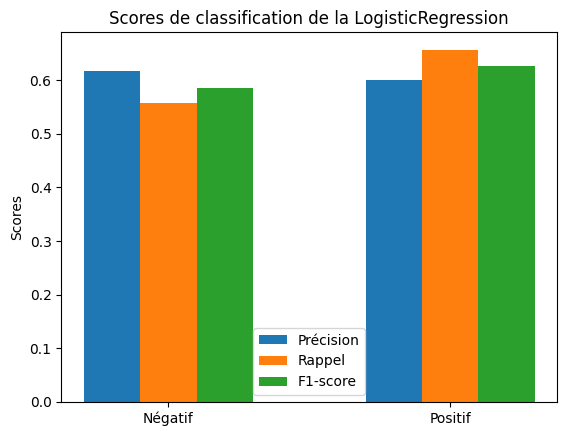

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Utilisez le rapport de classification pour extraire les métriques par classe
report = classification_report(y_test_naive, predictions_naive, target_names=['Négatif', 'Positif'], output_dict=True)

# Extraire les métriques de précision, rappel et F1-score
precision = [report[class_name]['precision'] for class_name in ['Négatif', 'Positif']]
recall = [report[class_name]['recall'] for class_name in ['Négatif', 'Positif']]
f1_score = [report[class_name]['f1-score'] for class_name in ['Négatif', 'Positif']]

# Les classes (0: négatif, 1: positif)
classes = ['Négatif', 'Positif']


width = 0.2  # Largeur des barres
x = np.arange(len(classes))  # Position des classes sur l'axe x

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Précision')
rects2 = ax.bar(x, recall, width, label='Rappel')
rects3 = ax.bar(x + width, f1_score, width, label='F1-score')

# Ajouter des étiquettes, des titres, et une légende
ax.set_ylabel('Scores')
ax.set_title('Scores de classification de la LogisticRegression')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Supprimer les annotations sur les barres
def remove_annotations(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

remove_annotations(rects1)
remove_annotations(rects2)
remove_annotations(rects3)

plt.show

# KNN (K-Nearest Neighbors) 

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Vous pouvez ajuster le nombre de voisins (n_neighbors)
knn_classifier.fit(X_train_naive, y_train_naive)

# Faites des prédictions sur l'ensemble de test
predictions_knn = knn_classifier.predict(X_test_naive)

In [65]:
accuracy_knn = accuracy_score(y_test_naive, predictions_knn)
classification_report_knn = classification_report(y_test_naive, predictions_knn)

print(f'Accuracy (KNN): {accuracy_knn}')
print('Classification Report (KNN):')
print(classification_report_knn)

Accuracy (KNN): 0.5575
Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.56      0.54      0.55       199
           1       0.56      0.58      0.57       201

    accuracy                           0.56       400
   macro avg       0.56      0.56      0.56       400
weighted avg       0.56      0.56      0.56       400



# RandomForest 

In [66]:
from sklearn.ensemble import RandomForestClassifier

#le modèle RandomForest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Vous pouvez ajuster le nombre d'arbres (n_estimators)
rf_classifier.fit(X_train_naive, y_train_naive)

# test
predictions_rf = rf_classifier.predict(X_test_naive)


In [67]:
accuracy_rf = accuracy_score(y_test_naive, predictions_rf)
classification_report_rf = classification_report(y_test_naive, predictions_rf)

print(f'Accuracy (RandomForest): {accuracy_rf}')
print('Classification Report (RandomForest):')
print(classification_report_rf)

Accuracy (RandomForest): 0.6375
Classification Report (RandomForest):
              precision    recall  f1-score   support

           0       0.64      0.61      0.63       199
           1       0.63      0.67      0.65       201

    accuracy                           0.64       400
   macro avg       0.64      0.64      0.64       400
weighted avg       0.64      0.64      0.64       400



In [68]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', C=1)  # Vous pouvez ajuster le noyau (kernel) et le paramètre de régularisation (C)
svm_classifier.fit(X_train_naive, y_train_naive)
predictions_svm = svm_classifier.predict(X_test_naive)
accuracy_svm = accuracy_score(y_test_naive, predictions_svm)
print(f'Accuracy (SVM): {accuracy_svm}')


Accuracy (SVM): 0.605


In [69]:
from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression(max_iter=1000)  # Vous pouvez ajuster d'autres paramètres comme max_iter
logreg_classifier.fit(X_train_naive, y_train_naive)
predictions_logreg = logreg_classifier.predict(X_test_naive)
accuracy_logreg = accuracy_score(y_test_naive, predictions_logreg)
print(f'Accuracy (Logistic Regression): {accuracy_logreg}')

Accuracy (Logistic Regression): 0.6075


In [70]:
import matplotlib.pyplot as plt
models = ['RandomForest', 'KNN', 'Naive Bayes', 'SVM', 'Logistic Regression']
accuracies = [accuracy_rf,accuracy_knn, accuracy_naive, accuracy_svm, accuracy_logreg]

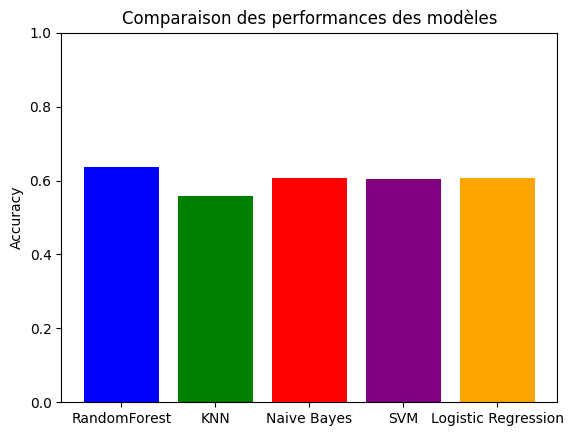

In [71]:
# Créer un graphique à barres
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylim(0, 1)  # Ajuster la plage y si nécessaire
plt.ylabel('Accuracy')
plt.title('Comparaison des performances des modèles')
plt.show()

KNN :
Accuracy : 58.25%
Precision : 58% pour la classe 0, 58% pour la classe 1
Recall : 57% pour la classe 0, 60% pour la classe 1
F1-score : 58% pour la classe 0, 59% pour la classe 1
Le modèle KNN montre une performance modérée avec une accuracy de 58.25%. 
Les valeurs de precision, recall et F1-score sont relativement équilibrées entre les deux classes

RandomForest :
Accuracy : 59.75%
Precision : 60% pour la classe 0, 60% pour la classe 1
Recall : 59% pour la classe 0, 61% pour la classe 1
F1-score : 59% pour la classe 0, 60% pour la classe 1
Le modèle RandomForest montre une performance similaire à KNN, avec une légère amélioration de l'accuracy à 59.75%. 
Les valeurs de precision, recall et F1-score sont également équilibrées entre les deux classes.

SVM :
Accuracy : 59.75%
Le modèle SVM a une accuracy similaire à RandomForest et KNN.

Logistic Regression :
Accuracy : 60%


In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
train_data, test_data, train_labels, test_labels = train_test_split(
   df_avis_wordvec['Avis'], df_avis_wordvec['Type'], test_size=0.2, random_state=42
)

# Utilisez TF-IDF pour extraire des fonctionnalités
vectorizer = TfidfVectorizer(max_features=5000)  # Vous pouvez ajuster le nombre de fonctionnalités
train_features = vectorizer.fit_transform(train_data)
test_features = vectorizer.transform(test_data)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Vous pouvez ajuster le nombre d'arbres (n_estimators)
rf_model.fit(train_features, train_labels)

predictions = rf_model.predict(test_features)

accuracy = accuracy_score(test_labels, predictions)
report = classification_report(test_labels, predictions)

print(f"Précision du modèle : {accuracy}")
print(f"Rapport de classification :\n{report}")

Précision du modèle : 0.815
Rapport de classification :
              precision    recall  f1-score   support

     negatif       0.79      0.86      0.82       199
     positif       0.85      0.77      0.81       201

    accuracy                           0.81       400
   macro avg       0.82      0.82      0.81       400
weighted avg       0.82      0.81      0.81       400



RandomForest :
Précision globale : 82%
Précision pour "negatif" : 80%
Précision pour "positif" : 86%


In [74]:
import joblib
#les données d'entraînement et de test
joblib.dump((train_data, train_labels), 'train_data_labels.pkl')
joblib.dump((test_data, test_labels), 'test_data_labels.pkl')

#le vectoriseur
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

#RandomForest
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [75]:
model = joblib.load('random_forest_model.pkl')
with open('testSentiment.txt', 'r', encoding='utf-8') as file:
    test_data = file.read()

In [76]:
import re
def preprocess_text(text):
    # minuscules
    text = text.lower()
    
    #  ponctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Supprimer les chiffres
    text = re.sub(r'\d+', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    #stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # concat les tokens en une phrase
    processed_text = ' '.join(tokens)
    
    return processed_text

In [77]:
from nltk.stem import PorterStemmer
processed_test_data = preprocess_text(test_data)
vectorizer = joblib.load('tfidf_vectorizer.pkl') 
X_test = vectorizer.transform([processed_test_data])

In [78]:
prediction = rf_model.predict(X_test)
print("Prédiction du sentiment :", prediction)

Prédiction du sentiment : ['negatif']


**le modèle a prédit que le sentiment du texte est négatif**

In [79]:
with open('postif_sen.txt', 'r', encoding='utf-8') as file:
    test_data_pos = file.read()

In [80]:
processed_test_data = preprocess_text(test_data_pos)
vectorizer = joblib.load('tfidf_vectorizer.pkl') 
X_test = vectorizer.transform([processed_test_data])

In [81]:
prediction_2 = rf_model.predict(X_test)
print("Prédiction du modèle :", prediction_2)

Prédiction du modèle : ['positif']
